In [10]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import matplotlib.pyplot as plt

base_folder = "experiments\\exp_20251014_180143\\"

files = [base_folder + "sweep_jj_epr_w0.20_20251014-1801-43.jsonl", 
         base_folder + "sweep_jj_epr_w0.50_20251014-1801-43.jsonl", 
         base_folder + "sweep_jj_epr_w0.90_20251014-1801-43.jsonl"]

def compare_plots(path, scale_epr = 5e-3):
    import json, numpy as np, matplotlib.pyplot as plt

    with open(path, "r") as f:
        rows = [json.loads(line) for line in f]

    params = np.array([r["params"] for r in rows], float)  # (N,2)
    x, y = params[:,0], params[:,1]
    loss_total = np.array([r["loss"] for r in rows], float)
    loss_jj    = np.array([r["loss_jj"] for r in rows], float)
    loss_epr   = np.array([r["loss_epr"]*scale_epr for r in rows], float)

    x_unique = np.unique(x)
    y_unique = np.unique(y)
    nx, ny = len(x_unique), len(y_unique)

    # Sanity: require full rectangular grid
    expected = {(float(xi), float(yj)) for xi in x_unique for yj in y_unique}
    present  = set(map(lambda t: (float(t[0]), float(t[1])), params))
    missing = expected - present
    if missing:
        raise ValueError(f"Grid missing {len(missing)} points, e.g. {next(iter(missing))}")

    # Consistent ordering: sort by x primary, y secondary, then reshape
    order = np.lexsort((y, x))  # last key (x) is primary
    x_s, y_s = x[order], y[order]
    Zt = loss_total[order].reshape(nx, ny)
    Zj = loss_jj[order].reshape(nx, ny)
    Ze = loss_epr[order].reshape(nx, ny)

    # Mesh that matches reshape (rows=x, cols=y)
    X, Y = np.meshgrid(x_unique, y_unique, indexing="ij")

    print(f"Grid is {nx} x {ny}")

    fig = plt.figure(figsize=(15, 5))

    ax1 = fig.add_subplot(141, projection='3d')
    s1 = ax1.plot_surface(X, Y, Zt, cmap='viridis')
    ax1.set(xlabel='Param X', ylabel='Param Y', zlabel='Total Loss', title='Total Loss')
    fig.colorbar(s1, ax=ax1, shrink=0.5)

    ax2 = fig.add_subplot(142, projection='3d')
    s2 = ax2.plot_surface(X, Y, Zj, cmap='plasma')
    ax2.set(xlabel='Param X', ylabel='Param Y', zlabel='JJ Loss', title='JJ Component')
    fig.colorbar(s2, ax=ax2, shrink=0.5)

    ax3 = fig.add_subplot(143, projection='3d')
    s3 = ax3.plot_surface(X, Y, Ze, cmap='inferno')
    ax3.set(xlabel='Param X', ylabel='Param Y', zlabel='EPR Loss', title='EPR Component')
    fig.colorbar(s3, ax=ax3, shrink=0.5)

    ax4 = fig.add_subplot(144, projection='3d')
    s4 = ax4.plot_surface(X, Y, Zj - Ze, cmap='cool')
    ax4.set(xlabel='Param X', ylabel='Param Y', zlabel='JJ - EPR', title='Difference in Loss')
    fig.colorbar(s4, ax=ax4, shrink=0.5)

    plt.tight_layout()
    plt.show()

    # Quick numeric check if they’re “the same”
    same = np.allclose(Zj, Ze, rtol=1e-6, atol=1e-9)
    print("JJ and EPR identical (allclose)?", same)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Grid is 5 x 5


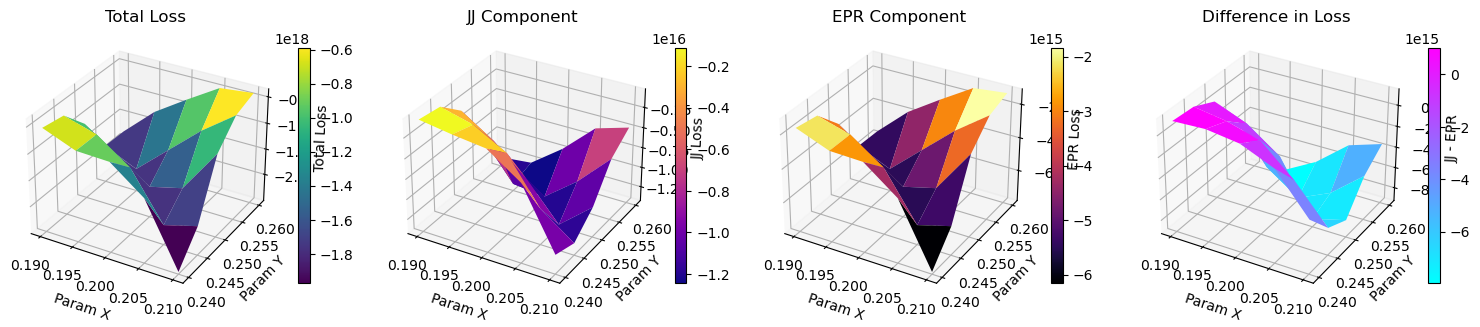

JJ and EPR identical (allclose)? False
Grid is 5 x 5


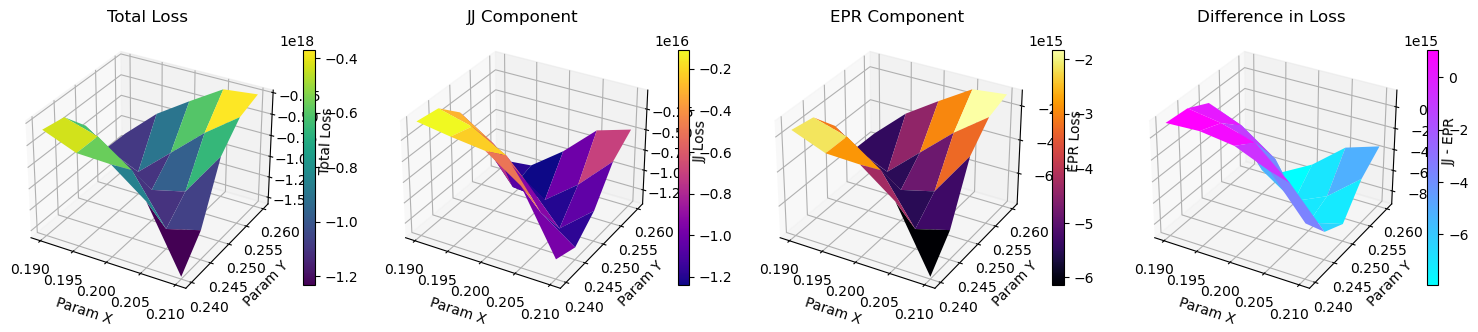

JJ and EPR identical (allclose)? False
Grid is 5 x 5


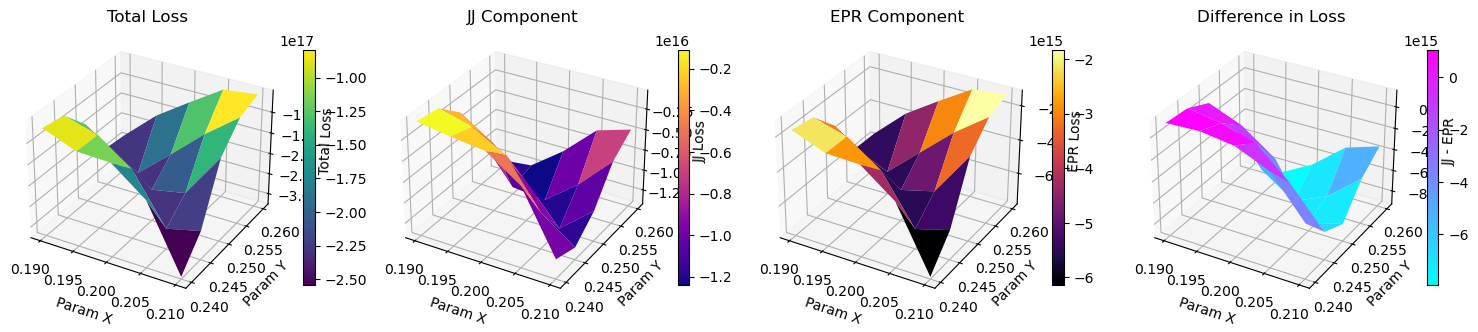

JJ and EPR identical (allclose)? False


In [13]:
for file in files:
    compare_plots(file, scale_epr=2.5e-3)

In [6]:
# Load both files
data_w20 = []
with open("sweep_jj_epr_w0.20_20251014-0106-49.jsonl", 'r') as f:
    for line in f:
        data_w20.append(json.loads(line))

data_w90 = []
with open("sweep_jj_epr_w0.90_20251014-0106-49.jsonl", 'r') as f:
    for line in f:
        data_w90.append(json.loads(line))

# Check first point
print("w=0.20:")
print(f"  loss_jj:  {data_w20[1]['loss_jj']:.3e}")
print(f"  loss_epr: {data_w20[1]['loss_epr']:.3e}")
print(f"  total:    {data_w20[1]['loss']:.3e}")
print(f"  expected: {0.2*data_w20[1]['loss_jj'] + 0.8*data_w20[1]['loss_epr']:.3e}")

print("\nw=0.90:")
print(f"  loss_jj:  {data_w90[1]['loss_jj']:.3e}")
print(f"  loss_epr: {data_w90[1]['loss_epr']:.3e}")
print(f"  total:    {data_w90[1]['loss']:.3e}")
print(f"  expected: {0.9*data_w90[1]['loss_jj'] + 0.1*data_w90[1]['loss_epr']:.3e}")

w=0.20:
  loss_jj:  -5.080e+17
  loss_epr: -5.198e+17
  total:    -5.174e+17
  expected: -5.174e+17

w=0.90:
  loss_jj:  -5.080e+17
  loss_epr: -5.198e+17
  total:    -5.091e+17
  expected: -5.091e+17
